<a href="https://colab.research.google.com/github/A-jha/TENSOR-FLOW-LAB/blob/master/Insurance_forcast_using_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import the library that we need
 - tensorflow (building neural network)
 - pandas (loading and wrangling data)
 - matplotlib.pyplot (visualizing the data )
 - numpy (use anywhere)

In [ ]:
# import required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Our dataset** 

- [Github link for Dataset](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv)

2. **How To Fetch Data From DataSet**
  - Go to github
  - convert to raw 
  - copy the link of raw dataset
  - then use pandas **read_csv(url)** (csv - comman saperated values)


In [ ]:
# read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Deep learning is everything about converting data to numbers
insurance["sex"]

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

3. **One Hot Encoding**


In [ ]:
#let's try one hot encoding to convert sex as male female
data = pd.get_dummies(insurance)
data.head(5)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


4. **Create X and Y Values**

In [ ]:
# Features are in X
X = data.drop("charges", axis = 1)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# Results is in Y
Y = data["charges"]
Y.head()

(0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64, 1338)

In [ ]:
len(X) == len(Y)

True

5. **Create Training and testing data from data**
  - X_train , Y_train
  - X_test , Y_test

  **Sklearn.modal_selection.train_test_split** - Split arrays and matrix into random train and test subset.

In [ ]:
# import sklearn train-test-split
from sklearn.model_selection import train_test_split
# split the data into 2 parts 
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = .20 , random_state = 42)

len(X_train),len(Y_train),len(X_test), len(Y_test)

(1070, 1070, 268, 268)

6. **Build Model Fromt the dataset** - Building a model is a process which may need multiple try and run of code.

- **First experimant**(one layer / 100 epochs / optimizer SGD)

In [ ]:
# 1. define the model
model_1 = tf.keras.Sequential([
                  tf.keras.layers.Dense(1)
])

# 2. Compile the mdel
model_1.compile(
    loss = "mae",
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

# 3. Fit the model 
model_1.fit(X_train, Y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 872us/step - loss: 12937.6309 - mae: 12937.6309
Epoch 2/100
34/34 [==============================] - 0s 836us/step - loss: 12090.2637 - mae: 12090.2637
Epoch 3/100
34/34 [==============================] - 0s 872us/step - loss: 11260.9453 - mae: 11260.9453
Epoch 4/100
34/34 [==============================] - 0s 844us/step - loss: 10497.1406 - mae: 10497.1406
Epoch 5/100
34/34 [==============================] - 0s 935us/step - loss: 9846.8086 - mae: 9846.8086
Epoch 6/100
34/34 [==============================] - 0s 895us/step - loss: 9297.6416 - mae: 9297.6416
Epoch 7/100
34/34 [==============================] - 0s 922us/step - loss: 8827.0742 - mae: 8827.0742
Epoch 8/100
34/34 [==============================] - 0s 913us/step - loss: 8445.8926 - mae: 8445.8926
Epoch 9/100
34/34 [==============================] - 0s 911us/step - loss: 8136.4253 - mae: 8136.4253
Epoch 10/100
34/34 [==============================] - 0s 922us/step - loss

In [ ]:
# predict the value
Y_pred = model_1.predict(X_test)
tf.shape(Y_pred)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([268,   1], dtype=int32)>

In [ ]:
# squeeze y_pred such that dimention is same as others
print("old shape : ",tf.shape(Y_pred))
Y_pred = tf.squeeze(Y_pred)
print("new shape :", tf.shape(Y_pred))

old shape :  tf.Tensor([268   1], shape=(2,), dtype=int32)
new shape : tf.Tensor([268], shape=(1,), dtype=int32)


In [ ]:
# calculate mean absolute error 
tf.metrics.mean_absolute_error(y_true=Y_test , y_pred= Y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=7000.159>

In [ ]:
# calculate mean square error
tf.metrics.mean_squared_error(y_true=Y_test, y_pred=Y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=163157840.0>

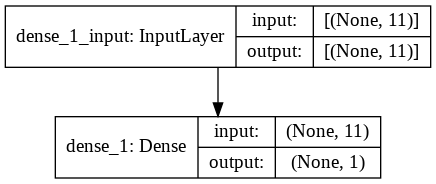

In [ ]:
# visualize the model
from tensorflow.keras.utils import plot_model
plot_model(model_1, show_shapes = True)

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


It looks like our model is not performing well let's experiment and try to improve our model

#### Defining some function which we need to run 

In [ ]:
# mean absolute error
def mae(y_true,y_pred):
  y_pred = tf.squeeze(y_pred)
  return tf.metrics.mean_absolute_error(y_true = y_true, y_pred = y_pred)
  
# mean squre error
def mse(y_true,y_pred):
  y_pred = tf.squeeze(y_pred)
  return tf.metrics.mean_squared_error(y_true = y_true, y_pred = y_pred)
  

**Second Experiment** (two layers / SGD optimizer/ 100 epochs)

In [ ]:
# define model_2
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100, name="Input_layer", activation="relu"),
                               tf.keras.layers.Dense(1, name="output_layer")
])

# compile the model
model_2.compile(
    loss="mae",
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

# fit the model
model_2.fit(X_train, Y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8586.5000 - mae: 8586.5000
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7820.6309 - mae: 7820.6309
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7748.0522 - mae: 7748.0522
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7579.4160 - mae: 7579.4160
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7577.9717 - mae: 7577.9717
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7783.6650 - mae: 7783.6650
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7644.8467 - mae: 7644.8467
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 8006.1196 - mae: 8006.1196
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7890.7056 - mae: 7890.7056
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7662.7583 - mae: 7662.7583

In [ ]:
# calulate prediction
Y_pred1 = model_2.predict(X_test)
#Y_pred1

In [ ]:
# calculate mae
mae(Y_test, Y_pred1)

<tf.Tensor: shape=(), dtype=float32, numpy=7824.573>

In [ ]:
# calculate mse
mse(Y_test, Y_pred1)

<tf.Tensor: shape=(), dtype=float32, numpy=109219576.0>

**Experiment-3 :** 
  - two layers
  - optimizer to ADAM and learning_rate .01 to .001
  - epochs = 200

In [ ]:
# define model_2
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100, name="Input_layer", activation="relu"),
                               tf.keras.layers.Dense(1, name="output_layer")
])

# compile the model
model_3.compile(
    loss="mae",
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["mae"]
)

# fit the model
model_3.fit(X_train, Y_train, epochs = 500,verbose=0)

In [ ]:
# calculate predicted Y
Y_pred3 = model_3.predict(X_test)

In [ ]:
# mae
mae(Y_test,Y_pred3)

<tf.Tensor: shape=(), dtype=float32, numpy=2006.8524>

In [ ]:
# mse
mse(Y_test,Y_pred3)

<tf.Tensor: shape=(), dtype=float32, numpy=23286924.0>

- here we have minimized the error in good amount 

**Experiment4 :**
  - _3 layers_ 
  - optimizers- ADAM(lr= .01) 
  - epochs = 500

In [ ]:
# define model_2
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100, name="Input_layer", activation="relu"),
                               tf.keras.layers.Dense(100, name="Hidden_layer", activation="relu"),
                               tf.keras.layers.Dense(1, name="output_layer")
])

# compile the model
model_4.compile(
    loss="mae",
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["mae"]
)

# fit the model
model_4.fit(X_train, Y_train, epochs = 500, verbose = 0)

- **Here by increasing layer we observe that loss function decreased**

In [ ]:
# predicted value
Y_pred4 = model_4.predict(X_test)

In [ ]:
#mae
mae(Y_test, Y_pred4)

<tf.Tensor: shape=(), dtype=float32, numpy=1602.7411>

**Experiment5 :**
  - add one more layer

In [ ]:
# define model_2
model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100, name="Input_layer", activation="relu"),
                               tf.keras.layers.Dense(100, name="Hidden_Laye_1", activation="relu"),
                               tf.keras.layers.Dense(100, name="Hidden_layer_2", activation="relu"),
                               tf.keras.layers.Dense(1, name="output_layer")
])

# compile the model
model_5.compile(
    loss="mae",
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["mae"]
)

# fit the model
history = model_5.fit(X_train, Y_train, epochs = 1000)

Epoch 1/1000
34/34 [==============================] - 0s 2ms/step - loss: 13276.1191 - mae: 13276.1191
Epoch 2/1000
34/34 [==============================] - 0s 2ms/step - loss: 12513.1660 - mae: 12513.1660
Epoch 3/1000
34/34 [==============================] - 0s 2ms/step - loss: 9140.1416 - mae: 9140.1416
Epoch 4/1000
34/34 [==============================] - 0s 2ms/step - loss: 7514.0732 - mae: 7514.0732
Epoch 5/1000
34/34 [==============================] - 0s 2ms/step - loss: 7416.7876 - mae: 7416.7876
Epoch 6/1000
34/34 [==============================] - 0s 2ms/step - loss: 7339.6694 - mae: 7339.6694
Epoch 7/1000
34/34 [==============================] - 0s 2ms/step - loss: 7264.6680 - mae: 7264.6680
Epoch 8/1000
34/34 [==============================] - 0s 2ms/step - loss: 7179.8687 - mae: 7179.8687
Epoch 9/1000
34/34 [==============================] - 0s 2ms/step - loss: 7090.0054 - mae: 7090.0054
Epoch 10/1000
34/34 [==============================] - 0s 2ms/step - loss: 7009.4053 - 

In [ ]:
# eavaluate the model
model_5.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1485.5172 - mae: 1485.5172


[1485.5172119140625, 1485.5172119140625]

Text(0.5, 0, 'epochs')

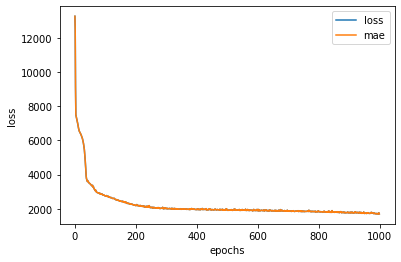

In [ ]:
# plot history (also known as a losss curve  or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# predicted value
Y_pred5 = model_5.predict(X_test)

In [ ]:
#mae
mae(Y_test, Y_pred5)

<tf.Tensor: shape=(), dtype=float32, numpy=1485.5173>

**How Long Should we train ?**
  - Tensorflow has a solution ! it's called [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
  - Stop training when a monitored metric has stopped improving.
  ```python
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.
model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
model.compile(tf.keras.optimizers.SGD(), loss='mse')
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
                    epochs=10, batch_size=1, callbacks=[callback],
                    verbose=0)
len(history.history['loss'])  # Only 4 epochs are run.

  ```
  - arg in callback
    - **patience** :	Number of epochs with no improvement after which training will be stopped.
    - **monitor**	: Quantity to be monitored.

**let's build our final model with callback**

**Experiment6 :** 
- introduce callback with patience of 10
- learning rate .01
- layers 100, 100, 10, 1
- optimzer ADAM
- epochs = 1000

In [ ]:
#define callback 
callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=10)
# define model_2
model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100, name="Input_layer", activation="relu"),
                               tf.keras.layers.Dense(100, name="Hidden_Laye_1", activation="relu"),
                               tf.keras.layers.Dense(10, name="Hidden_layer_2", activation="relu"),
                               tf.keras.layers.Dense(1, name="output_layer")
])

# compile the model
model_6.compile(
    loss="mae",
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["mae"]
)

# fit the model
history = model_6.fit(X_train, Y_train,callbacks = [callback], batch_size=1, epochs = 1000)

Epoch 1/1000
1070/1070 [==============================] - 2s 1ms/step - loss: 6419.4937 - mae: 6419.4937
Epoch 2/1000
1070/1070 [==============================] - 1s 1ms/step - loss: 4016.1958 - mae: 4016.1958
Epoch 3/1000
1070/1070 [==============================] - 1s 1ms/step - loss: 3688.7227 - mae: 3688.7227
Epoch 4/1000
1070/1070 [==============================] - 1s 1ms/step - loss: 3427.5725 - mae: 3427.5725
Epoch 5/1000
1070/1070 [==============================] - 1s 1ms/step - loss: 3366.0649 - mae: 3366.0649
Epoch 6/1000
1070/1070 [==============================] - 1s 1ms/step - loss: 3302.4636 - mae: 3302.4636
Epoch 7/1000
1070/1070 [==============================] - 1s 1ms/step - loss: 3155.4932 - mae: 3155.4932
Epoch 8/1000
1070/1070 [==============================] - 1s 1ms/step - loss: 3044.1694 - mae: 3044.1694
Epoch 9/1000
1070/1070 [==============================] - 1s 1ms/step - loss: 3028.9451 - mae: 3028.9451
Epoch 10/1000
1070/1070 [==============================


**here our model stop improving after only 49 epochs and Earlystooping stop the itteration**

In [ ]:
# predict value
Y_pred6 = model_6.predict(X_test)

In [ ]:
#evaluate
model_6.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2027.0586 - mae: 2027.0586


[2027.05859375, 2027.05859375]

Text(0.5, 0, 'epochs')

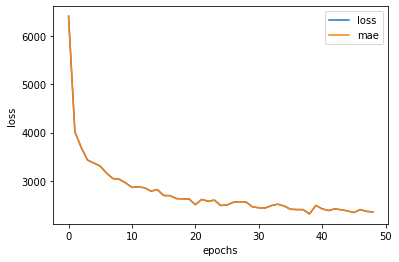

In [ ]:
# plot history (also known as a losss curve  or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### preprocessing the data ( Normalization and Standarization )

**What is Normalization ?**

 The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

 For example, consider a data set containing two features, age(x1), and income(x2). Where age ranges from 0–100, while income ranges from 0–20,000 and higher. Income is about 1,000 times larger than age and ranges from 20,000–500,000. So, these two features are in very different ranges. When we do further analysis, like multivariate linear regression, for example, the attributed income will intrinsically influence the result more due to its larger value. But this doesn’t necessarily mean it is more important as a predictor.

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


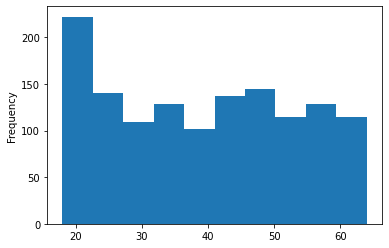

In [ ]:
X["age"].plot(kind = "hist")

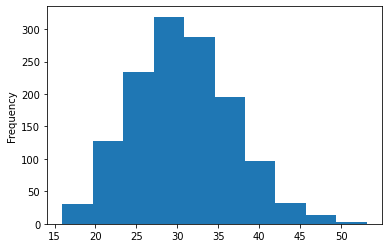

In [ ]:
X["bmi"].plot(kind="hist")

## Featuring Scale
|Scaling Type|What it does | Scikit-Learn Function | When to use|
|------------|------------|------------------------|------------|
|Scale (also referes to Normalization) | Coverts all values to between 0 and 1 whilst preserving the original distributuion | MinMaxScaler | Use as default Scaler with neural network |
|Standarization | Removes the mean and divides ecah value by the standard deviation. | StandardScaler | Transform a feature to have close to normal distribution (caution: this reduces the effect of Outliers)